In [1]:
import os
import math
import pandas as pd
import numpy as np

# Configuration settings
from chasm.config import CONFIG

# PLINK preprocessing utilities
from chasm.plink_preprocessing import (
    test, 
    concat_AFs, 
    divide_into_chunks, 
    make_ids,
    make_AFs
)

from chasm.data_preprocessing import (
    is_snp,
    make_df,
    calculate_AFs,
    merge_AFs_ensembl_build,
    divide_into_chunks
)
from chasm.gwas import ols_regression, pca_of_n_snps, project_on_dimensions

from chasm.visualization import make_population_plot
from chasm.ld_blocks import segmenter
from chasm.abyss import linear_abyss

In [2]:
# Changing the GTM data into a pickle file having an id file and calculating the AFs for each SNP 
# with the CHROM:POS for every corresponding RSID
"""
# GTM data
path_data_raw = f"{CONFIG['PATH_data']}/00_raw/recoded_1000G.raw"
path_raw = f"{CONFIG['PATH_data']}/01_raw/"
path_usefull = f"{CONFIG['PATH_data']}/02_usefull/"

geno = make_df(path_data_raw, path_usefull, path_output)

afs = calculate_AFs(geno)

path_ensembl = f"/mnt/e/1000G_data/usefull/ensembl_build"
merge_AFs_ensembl_build(path_ensembl, path_usefull, afs)
"""
# Divide the AFs into chunks
"""
size_chunck = 20_000
min_maf = 0.01

path_raw = f"{CONFIG['PATH_data']}/01_raw/"
path_afs = f"{CONFIG['PATH_data']}/usefull/allele_frequencies.pkl"
path_output = f"{CONFIG['PATH_data']}/03_macro_similar_AF/"

divide_into_chunks(path_raw, path_afs, path_output, size_chunck, min_maf)
"""

'\nsize_chunck = 20_000\nmin_maf = 0.01\n\npath_raw = f"{CONFIG[\'PATH_data\']}/01_raw/"\npath_afs = f"{CONFIG[\'PATH_data\']}/usefull/allele_frequencies.pkl"\npath_output = f"{CONFIG[\'PATH_data\']}/03_macro_similar_AF/"\n\ndivide_into_chunks(path_raw, path_afs, path_output, size_chunck, min_maf)\n'

# Choose SNPs to project on n dimensions

In [ ]:
"""
path_input = f"{CONFIG['PATH_data']}/03_macro_similar_AF/"
path_output = f"{CONFIG['PATH_data']}/04_projected/"
nr_of_projected_dimensions = 3
project_on_dimensions(path_input, path_output, nr_of_projected_dimensions)
"""


# Observe raw dimensions

In [2]:
path_input = f"{CONFIG['PATH_data']}/04_projected/"

In [20]:
path_afs = f"{CONFIG['PATH_data']}/usefull/allele_frequencies.pkl"
path_ids = f"{CONFIG['PATH_data']}/usefull/ids.pkl"
path_panel = f"{CONFIG['PATH_data']}/usefull/all.panel"
ids = pd.read_pickle(path_ids)
labels = pd.read_pickle(path_panel)
merged_df = ids.merge(labels, left_on="IID", right_on="Sample name")
dims = [f for f in os.listdir(path_input) if f.startswith("dim")]
for dim in dims:
    path_dim = f"{path_input}/{dim}"
    PCs = [f for f in os.listdir(path_dim) if f.startswith("global")][0]
    path_PC = f"{path_dim}/{PCs}"
    PC_dim = pd.read_pickle(path_PC)
    merged_df[dim] = PC_dim['PC1']
    

In [23]:
merged_df

,FID,IID,PAT,MAT,SEX,PHENOTYPE,Sample name,Sex,Population code,Population name,Superpopulation code,Superpopulation name,dim_1,dim_2,dim_3
0,AFR,HG01879,0,0,1,-9,HG01879,male,ACB,African Caribbean,AFR,African Ancestry,27.279760,3.914117,-1.107932
1,AFR,HG01880,0,0,2,-9,HG01880,female,ACB,African Caribbean,AFR,African Ancestry,15.413400,3.068011,-7.962757
2,AFR,HG01882,0,0,1,-9,HG01882,male,ACB,African Caribbean,AFR,African Ancestry,33.273187,7.231585,-2.294286
3,AFR,HG01883,0,0,2,-9,HG01883,female,ACB,African Caribbean,AFR,African Ancestry,28.539121,4.071523,-1.155551
4,AFR,HG01885,0,0,1,-9,HG01885,male,ACB,African Caribbean,AFR,African Ancestry,32.157301,7.531152,-1.323286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499,SAS,NA21137,0,0,2,-9,NA21137,female,GIH,Gujarati,SAS,South Asian Ancestry,-8.677231,-7.725275,-20.677679
2500,SAS,NA21141,0,0,2,-9,NA21141,female,GIH,Gujarati,SAS,South Asian Ancestry,-10.335073,-7.870237,-18.574760
2501,SAS,NA21142,0,0,2,-9,NA21142,female,GIH,Gujarati,SAS,South Asian Ancestry,-8.402776,-6.258888,-18.349934
2502,SAS,NA21143,0,0,2,-9,NA21143,female,GIH,Gujarati,SAS,South Asian Ancestry,-8.668646,-8.570404,-20.169913


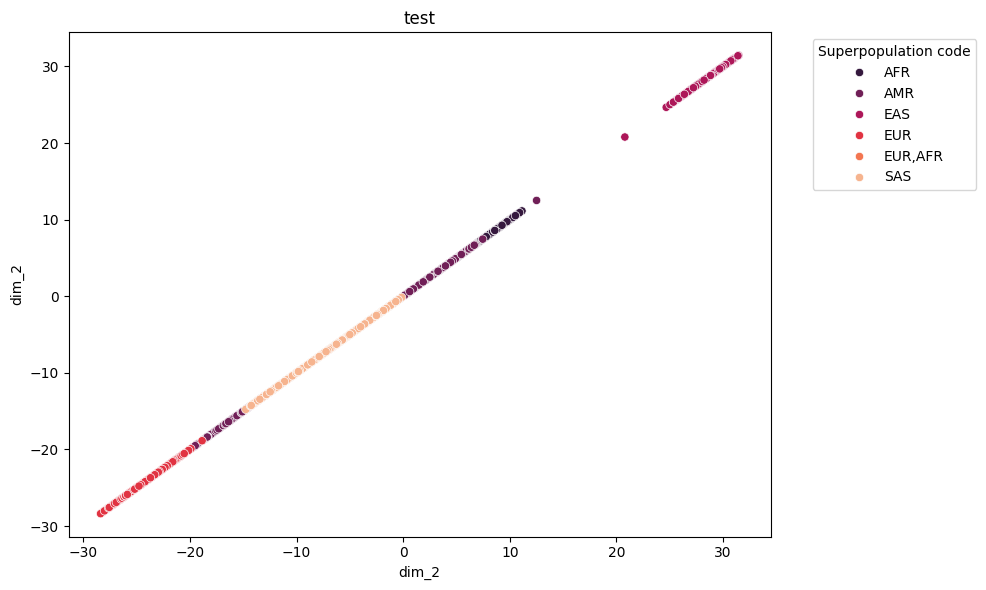

In [31]:
make_population_plot(merged_df, 'dim_2', 'dim_2', 'Superpopulation code', 'test', palette = 'rocket')

In [ ]:
"""
N_PCs = 2
N_snps_block = 100

path_input = f"{CONFIG['PATH_data']}/04_projected/"
path_output = f"{CONFIG['PATH_data']}/05_ld_blocks/"

for dim in os.listdir(path_input):
    path_dim = f"{path_input}/{dim}"
    for chrom in [f for f in os.listdir(path_dim) if f.startswith("chrom")]:
        path_input_chrom = f"{path_dim}/{chrom}/"
        path_output_chrom = f"{path_output}/{dim}/{chrom}/"
        os.makedirs(path_output_chrom, exist_ok=True)
        for file in os.listdir(path_input_chrom):
            filename = file.split(".pkl")[0]
            segmenter(path_input_chrom, path_output_chrom, filename , N_PCs, N_snps_block)
"""

In [ ]:
path_input = f"{CONFIG['PATH_data']}/05_LD_blocks/"
path_output = f"{CONFIG['PATH_data']}/06_esti_mafs/"
n_components = 2

for dim in os.listdir(path_input):
    path_dim = f"{path_input}/{dim}"
    for chrom in [f for f in os.listdir(path_dim) if f.startswith("chrom")]:
        path_input_chrom = f"{path_dim}/{chrom}/"
        path_output_chrom = f"{path_output}/{dim}/{chrom}/"
        blocks = [f for f in os.listdir(path_input_chrom) if f.startswith("block")]
        for block in blocks:
            linear_abyss(path_input_chrom, block, path_output_chrom, n_components, p2=True, twopq=True, q2=True)

In [15]:
path_input_chrom

'/mnt/e/GTM_data2/05_LD_blocks//dim_1/chrom_1/'

# Divide into LD blocks

0